# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
from sklearn.model_selection import train_test_split


In [36]:
import tensorflow as tf # Library to construct neural newtorks. Low level library. Created by google
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

In [39]:
# Callbacks are Keras tools to kepp track of the training progress

from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training 
# if the validation error increases. That prevents overfitting.
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.


In [171]:
from sklearn.metrics import cohen_kappa_score, classification_report 

# Functions

In [65]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [69]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    # from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

In [ ]:
# change class to xWins

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

### Read tic-tac-toe.csv into a dataframe.

In [6]:
ttt = pd.read_csv('../data/tic-tac-toe.csv')
ttt

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [7]:
ttt.head(20)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
5,x,x,x,x,o,o,b,b,o,True
6,x,x,x,x,o,b,o,o,b,True
7,x,x,x,x,o,b,o,b,o,True
8,x,x,x,x,o,b,b,o,o,True
9,x,x,x,x,b,o,o,o,b,True


In [10]:
# rename class
ttt.rename(columns={'class':'xWins'}, inplace=True)
ttt.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,xWins
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


### Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.

In [13]:
for col in ttt.columns:
    print(ttt[col].value_counts())

x    418
o    335
b    205
Name: TL, dtype: int64
x    378
o    330
b    250
Name: TM, dtype: int64
x    418
o    335
b    205
Name: TR, dtype: int64
x    378
o    330
b    250
Name: ML, dtype: int64
x    458
o    340
b    160
Name: MM, dtype: int64
x    378
o    330
b    250
Name: MR, dtype: int64
x    418
o    335
b    205
Name: BL, dtype: int64
x    378
o    330
b    250
Name: BM, dtype: int64
x    418
o    335
b    205
Name: BR, dtype: int64
True     626
False    332
Name: xWins, dtype: int64


### Convert the categorical values to numeric in all columns.

In [11]:
ttt.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
xWins      bool
dtype: object

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder does not suit with sparse_categorical_crossentropy

# Possible alternatives:
    # use mappers or lambda function
    # use labelEncoder
    # apply transformer

In [ ]:
# Question
# ??? Why not min_max_scaler ? Was not supposed to be the scaler for the NN?
# Review results of standardScaler and PowerTransformer

In [15]:
# split X - y
X = ttt.iloc[:,:-1]
y = ttt.iloc[:,-1]

#### X

In [16]:
X

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b
...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x
954,o,x,o,x,x,o,x,o,x
955,o,x,o,x,o,x,x,o,x
956,o,x,o,o,x,x,x,o,x


In [ ]:
# ??? drop = 'first'

In [ ]:
# sparse = false
# sparse matrix will drop valueError when fitting the NN

# ??? to_array --> sparse = False will do it

# ??? pd.DataFrame() 

In [45]:
encoder_X = OneHotEncoder(sparse=False)
encoder_X.fit(X)

OneHotEncoder(sparse=False)

In [46]:
encoder_X.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

In [47]:
X_num = encoder_X.transform(X)
X_num

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [21]:
# X_num.head()

In [48]:
encoder_X.get_feature_names_out()

array(['TL_b', 'TL_o', 'TL_x', 'TM_b', 'TM_o', 'TM_x', 'TR_b', 'TR_o',
       'TR_x', 'ML_b', 'ML_o', 'ML_x', 'MM_b', 'MM_o', 'MM_x', 'MR_b',
       'MR_o', 'MR_x', 'BL_b', 'BL_o', 'BL_x', 'BM_b', 'BM_o', 'BM_x',
       'BR_b', 'BR_o', 'BR_x'], dtype=object)

#### y

In [37]:
# y_num = y.apply(lambda x: 1 if x == True else 0)
# y_num

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: xWins, Length: 958, dtype: int64

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

### Train - test split

In [ ]:
# ??? works with boolean in y?

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state=0, test_size=0.2)

In [55]:
X_train

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [56]:
y_train

338     True
588     True
62      True
79      True
651    False
       ...  
835    False
192     True
629    False
559     True
684    False
Name: xWins, Length: 766, dtype: bool

### Build and compile the NN

In [57]:
X_train.shape

(766, 27)

In [58]:
X_test.shape

(192, 27)

In [ ]:
# Question
# which activation if last layer units=1 --> sigmoid

In [73]:
# Here, the "patience" keyword controls how many iterations the network will do without improving 
# the cost function before stopping.
early_stopping = EarlyStopping(patience=5) 


model_c1 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 32 neurons
# each neuron will have a "RELU" activation function
model_c1.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with 16 neurons with "RELU" activation function
model_c1.add(Dense(units = 16,activation='relu'))
# Adding the final layer
model_c1.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_c1.compile(optimizer='adam', # optimizer='rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )


model_c1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                896       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________


### y

In [74]:
y_train_a = keras.utils.to_categorical(y_train, num_classes=2)
y_train_a

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### fit NN

In [ ]:
# Backup model

In [75]:
checkpoint_path = '../models/cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [ ]:
# Question
# ??? Everytime I fit the model it changes...
# ??? which is the fit function? where is its documentation?

In [76]:
history_c1 = model_c1.fit(
    X_train, 
    y_train_a, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=15, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

# ValueError: `validation_split` is only supported 
# for Tensors or NumPy arrays, found following types in the input: [<class 'scipy.sparse._csr.csr_matrix'>]

# Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropy
#WithLogits'
# logits and labels must have the same first dimension, got logits shape [15,2] and labels shape [30]
# [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCross
#EntropyWithLogits}}]] [Op:__inference_train_function_906]

# https://stackoverflow.com/questions/56301426/tensorflow-keras-logits-and-labels-must-have-the-same-first-dimension-how-to

Epoch 1/60

Epoch 1: saving model to ../models/cls-nn1.hdf5
41/41 - 1s - loss: 0.6545 - accuracy: 0.6225 - val_loss: 0.6346 - val_accuracy: 0.6623 - 668ms/epoch - 16ms/step
Epoch 2/60

Epoch 2: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.5839 - accuracy: 0.7010 - val_loss: 0.5757 - val_accuracy: 0.7208 - 100ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.5468 - accuracy: 0.7271 - val_loss: 0.5398 - val_accuracy: 0.7662 - 98ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.5137 - accuracy: 0.7484 - val_loss: 0.5048 - val_accuracy: 0.7922 - 92ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.4842 - accuracy: 0.7598 - val_loss: 0.4755 - val_accuracy: 0.7922 - 92ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.4544 - accuracy: 0.7876 - val_loss: 0.4568 - val_accuracy: 0.

Epoch 49/60

Epoch 49: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9805 - 93ms/epoch - 2ms/step
Epoch 50/60

Epoch 50: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9805 - 89ms/epoch - 2ms/step
Epoch 51/60

Epoch 51: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9805 - 93ms/epoch - 2ms/step
Epoch 52/60

Epoch 52: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9805 - 93ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9805 - 104ms/epoch - 3ms/step
Epoch 54/60

Epoch 54: saving model to ../models/cls-nn1.hdf5
41/41 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0438 - val_ac

### Evaluate

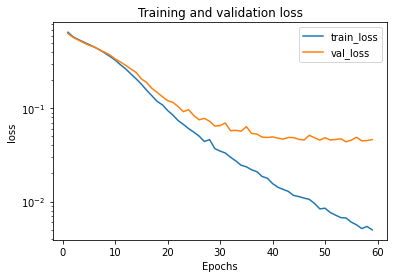

In [77]:
plot_metric(history_c1,'loss')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# your code here

In [78]:
y_pred_train_c1 = model_c1.predict(X_train) # This provides the probability for each class
y_pred_test_c1  = model_c1.predict(X_test) # This provides the probability for each class

# !!! We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c1, y_test, y_pred_test_c1)

6/6 [==============================] - 0s 1ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       258
        True       1.00      1.00      1.00       508

    accuracy                           1.00       766
   macro avg       1.00      1.00      1.00       766
weighted avg       1.00      1.00      1.00       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.97
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        74
        True       0.98      1.00      0.99       118

    accuracy                           0.98       192
   macro avg       0.99      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192



## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [72]:
# It does not need to be improved but I will exercise adding more layers and changing the learning rate

### Add dropout layers

In [79]:
model_c2 = keras.Sequential()


model_c2.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))

model_c2.add(Dropout(0.25))

model_c2.add(Dense(units = 16,activation='relu'))

model_c2.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_c2.compile(optimizer= 'adam', # 'rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )


model_c2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                896       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________


In [80]:
checkpoint_path = '../models/cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

#### fit

In [82]:
history_c2 = model_c2.fit(
    X_train, 
    y_train_a, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=15, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to ../models/cls-nn2.hdf5
41/41 - 1s - loss: 0.6386 - accuracy: 0.6389 - val_loss: 0.6203 - val_accuracy: 0.6558 - 609ms/epoch - 15ms/step
Epoch 2/60

Epoch 2: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.6062 - accuracy: 0.6748 - val_loss: 0.5845 - val_accuracy: 0.6883 - 98ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.5802 - accuracy: 0.6912 - val_loss: 0.5602 - val_accuracy: 0.7143 - 97ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.5596 - accuracy: 0.7075 - val_loss: 0.5354 - val_accuracy: 0.7532 - 116ms/epoch - 3ms/step
Epoch 5/60

Epoch 5: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.5547 - accuracy: 0.7092 - val_loss: 0.5146 - val_accuracy: 0.7857 - 95ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.5272 - accuracy: 0.7418 - val_loss: 0.4955 - val_accuracy: 0.

Epoch 49/60

Epoch 49: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.0349 - val_accuracy: 1.0000 - 92ms/epoch - 2ms/step
Epoch 50/60

Epoch 50: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0821 - accuracy: 0.9673 - val_loss: 0.0401 - val_accuracy: 0.9935 - 89ms/epoch - 2ms/step
Epoch 51/60

Epoch 51: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0628 - accuracy: 0.9755 - val_loss: 0.0383 - val_accuracy: 0.9935 - 90ms/epoch - 2ms/step
Epoch 52/60

Epoch 52: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0673 - accuracy: 0.9755 - val_loss: 0.0342 - val_accuracy: 1.0000 - 91ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0727 - accuracy: 0.9739 - val_loss: 0.0442 - val_accuracy: 0.9805 - 96ms/epoch - 2ms/step
Epoch 54/60

Epoch 54: saving model to ../models/cls-nn2.hdf5
41/41 - 0s - loss: 0.0592 - accuracy: 0.9869 - val_loss: 0.0331 - val_acc

In [ ]:
# The loss (categorical cross entropy) is worse

#### Evaluate

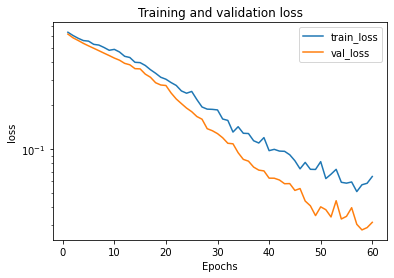

In [84]:
plot_metric(history_c2,'loss')

#### Predictions

In [85]:
y_pred_train_c2 = model_c2.predict(X_train) # This provides the probability for each class
y_pred_test_c2  = model_c2.predict(X_test) # This provides the probability for each class

# !!! We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c2 = np.argmax(y_pred_train_c2, axis=1).reshape(-1,1)
y_pred_test_c2 = np.argmax(y_pred_test_c2, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c2, y_test, y_pred_test_c2)

6/6 [==============================] - 0s 1ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       258
        True       1.00      1.00      1.00       508

    accuracy                           0.99       766
   macro avg       0.99      0.99      0.99       766
weighted avg       0.99      0.99      0.99       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.92
              precision    recall  f1-score   support

       False       0.96      0.95      0.95        74
        True       0.97      0.97      0.97       118

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192



In [86]:
# In that case with the dropout layer the scores seem to have decreased

### Adjust learning rate

In [ ]:
# Question
# ??? What is converging?
# ??? How are related the weights to the loss function?

There is a valley shape for each optimizer: too low a learning rate never progresses, too high a learning rate causes instability and never converges. In between there is a band of “just right” learning rates that successfully train.

#### learning rates

In [ ]:
# Create a grid search for that with the best parameters in the article
# optimizer = keras.optimizers.Adam(lr=0.01)
# lrs = [0.0005, 0.001, 0.0015, 0.01]

# train_metrics = history.history[metric] # Get the error metric for the TRAIN set
# val_metrics = history.history['val_'+metric]

In [130]:
lrs = np.logspace(np.log10(0.000001),np.log10(100))
lrs

array([1.00000000e-06, 1.45634848e-06, 2.12095089e-06, 3.08884360e-06,
       4.49843267e-06, 6.55128557e-06, 9.54095476e-06, 1.38949549e-05,
       2.02358965e-05, 2.94705170e-05, 4.29193426e-05, 6.25055193e-05,
       9.10298178e-05, 1.32571137e-04, 1.93069773e-04, 2.81176870e-04,
       4.09491506e-04, 5.96362332e-04, 8.68511374e-04, 1.26485522e-03,
       1.84206997e-03, 2.68269580e-03, 3.90693994e-03, 5.68986603e-03,
       8.28642773e-03, 1.20679264e-02, 1.75751062e-02, 2.55954792e-02,
       3.72759372e-02, 5.42867544e-02, 7.90604321e-02, 1.15139540e-01,
       1.67683294e-01, 2.44205309e-01, 3.55648031e-01, 5.17947468e-01,
       7.54312006e-01, 1.09854114e+00, 1.59985872e+00, 2.32995181e+00,
       3.39322177e+00, 4.94171336e+00, 7.19685673e+00, 1.04811313e+01,
       1.52641797e+01, 2.22299648e+01, 3.23745754e+01, 4.71486636e+01,
       6.86648845e+01, 1.00000000e+02])

In [139]:
lrs2 = np.logspace(np.log10(0.000001),np.log10(100), num=48, endpoint=False)
lrs2

array([1.00000000e-06, 1.46779927e-06, 2.15443469e-06, 3.16227766e-06,
       4.64158883e-06, 6.81292069e-06, 1.00000000e-05, 1.46779927e-05,
       2.15443469e-05, 3.16227766e-05, 4.64158883e-05, 6.81292069e-05,
       1.00000000e-04, 1.46779927e-04, 2.15443469e-04, 3.16227766e-04,
       4.64158883e-04, 6.81292069e-04, 1.00000000e-03, 1.46779927e-03,
       2.15443469e-03, 3.16227766e-03, 4.64158883e-03, 6.81292069e-03,
       1.00000000e-02, 1.46779927e-02, 2.15443469e-02, 3.16227766e-02,
       4.64158883e-02, 6.81292069e-02, 1.00000000e-01, 1.46779927e-01,
       2.15443469e-01, 3.16227766e-01, 4.64158883e-01, 6.81292069e-01,
       1.00000000e+00, 1.46779927e+00, 2.15443469e+00, 3.16227766e+00,
       4.64158883e+00, 6.81292069e+00, 1.00000000e+01, 1.46779927e+01,
       2.15443469e+01, 3.16227766e+01, 4.64158883e+01, 6.81292069e+01])

In [135]:
lrs[18:35]

array([0.00086851, 0.00126486, 0.00184207, 0.0026827 , 0.00390694,
       0.00568987, 0.00828643, 0.01206793, 0.01757511, 0.02559548,
       0.03727594, 0.05428675, 0.07906043, 0.11513954, 0.16768329,
       0.24420531, 0.35564803])

In [137]:
lrs[18:31]

array([0.00086851, 0.00126486, 0.00184207, 0.0026827 , 0.00390694,
       0.00568987, 0.00828643, 0.01206793, 0.01757511, 0.02559548,
       0.03727594, 0.05428675, 0.07906043])

In [142]:
lrs2[16:32]

array([0.00046416, 0.00068129, 0.001     , 0.0014678 , 0.00215443,
       0.00316228, 0.00464159, 0.00681292, 0.01      , 0.01467799,
       0.02154435, 0.03162278, 0.04641589, 0.06812921, 0.1       ,
       0.14677993])

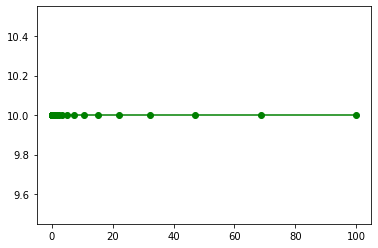

In [128]:
#plt.plot(np.array(range(1,200,5)), np.linspace(1,1,40), 'b', marker='o')
#plt.plot(np.log10(range(1,200,5)), np.linspace(5,5,40), 'r', marker='o')
plt.plot(np.logspace(np.log10(0.000001),np.log10(100)), np.linspace(10,10,50), 'g', marker='o')
plt.show()

#### Choose Learning Rate - Build NN

In [153]:
from sklearn.model_selection import GridSearchCV

In [147]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# optimizer = keras.optimizers.Adam(lr=0.01)


In [156]:
lr_grid = lrs2[16:32].tolist()
lr_grid

[0.00046415888336127773,
 0.0006812920690579609,
 0.001,
 0.0014677992676220691,
 0.002154434690031882,
 0.0031622776601683794,
 0.004641588833612777,
 0.006812920690579608,
 0.01,
 0.014677992676220676,
 0.021544346900318822,
 0.03162277660168379,
 0.046415888336127725,
 0.06812920690579609,
 0.1,
 0.14677992676220675]

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 32)                896       
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_127 (Dense)           (None, 16)                528       
                                                                 
 dense_128 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


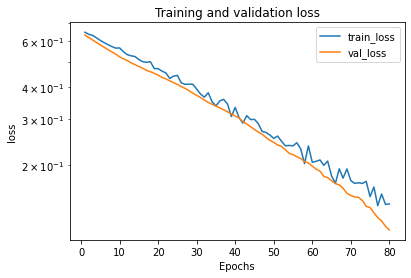

6/6 [==============================] - 0s 1ms/step
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 32)                896       
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_130 (Dense)           (None, 16)                528       
                                                                 
 dense_131 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


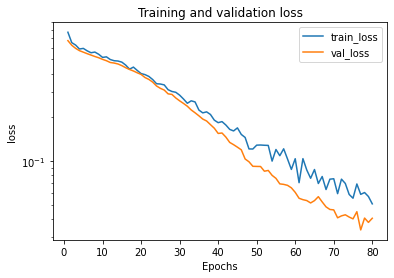

6/6 [==============================] - 0s 1ms/step
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 32)                896       
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_133 (Dense)           (None, 16)                528       
                                                                 
 dense_134 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


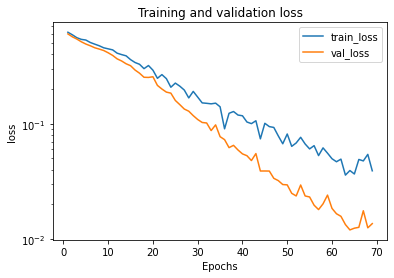

6/6 [==============================] - 0s 1ms/step
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 32)                896       
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_136 (Dense)           (None, 16)                528       
                                                                 
 dense_137 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


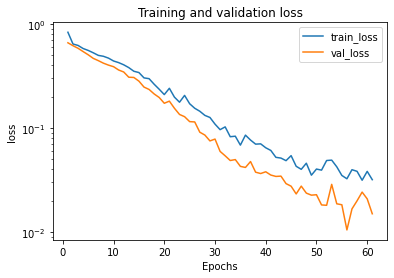

6/6 [==============================] - 0s 988us/step
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 32)                896       
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                                                 
 dense_139 (Dense)           (None, 16)                528       
                                                                 
 dense_140 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


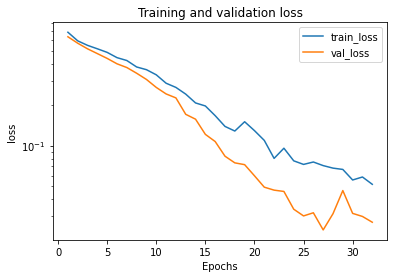

6/6 [==============================] - 0s 1ms/step
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 32)                896       
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_142 (Dense)           (None, 16)                528       
                                                                 
 dense_143 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


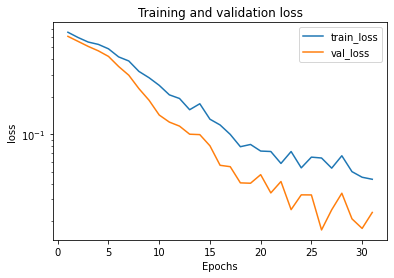

6/6 [==============================] - 0s 2ms/step
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 32)                896       
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_145 (Dense)           (None, 16)                528       
                                                                 
 dense_146 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


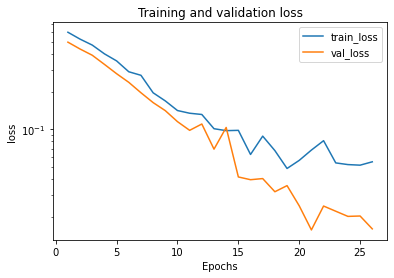

6/6 [==============================] - 0s 1ms/step
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 32)                896       
                                                                 
 dropout_44 (Dropout)        (None, 32)                0         
                                                                 
 dense_148 (Dense)           (None, 16)                528       
                                                                 
 dense_149 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


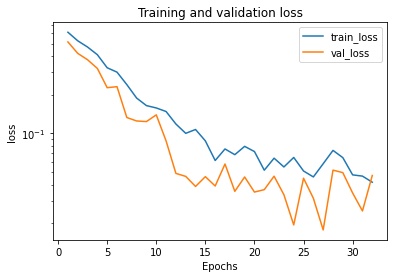

6/6 [==============================] - 0s 1ms/step
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 32)                896       
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_151 (Dense)           (None, 16)                528       
                                                                 
 dense_152 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


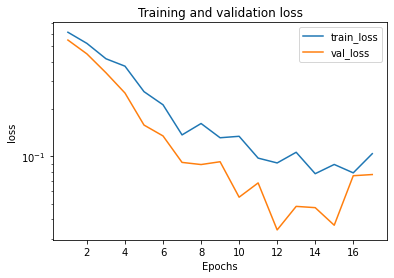

6/6 [==============================] - 0s 1ms/step
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_153 (Dense)           (None, 32)                896       
                                                                 
 dropout_46 (Dropout)        (None, 32)                0         
                                                                 
 dense_154 (Dense)           (None, 16)                528       
                                                                 
 dense_155 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


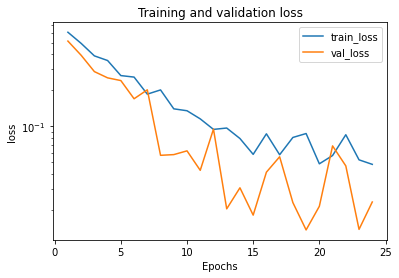

6/6 [==============================] - 0s 1ms/step
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 32)                896       
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                                                 
 dense_157 (Dense)           (None, 16)                528       
                                                                 
 dense_158 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


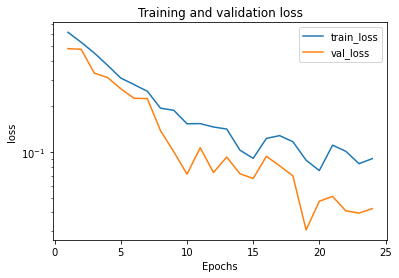

6/6 [==============================] - 0s 1ms/step
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 32)                896       
                                                                 
 dropout_48 (Dropout)        (None, 32)                0         
                                                                 
 dense_160 (Dense)           (None, 16)                528       
                                                                 
 dense_161 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


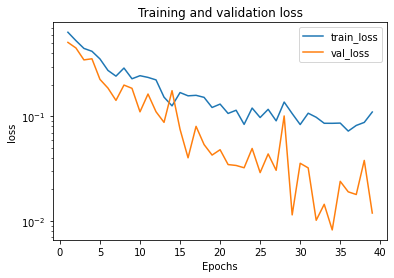

6/6 [==============================] - 0s 1ms/step
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 32)                896       
                                                                 
 dropout_49 (Dropout)        (None, 32)                0         
                                                                 
 dense_163 (Dense)           (None, 16)                528       
                                                                 
 dense_164 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


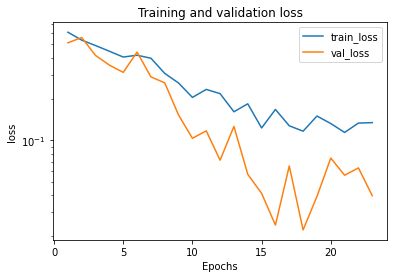

6/6 [==============================] - 0s 1ms/step
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 32)                896       
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                                                 
 dense_166 (Dense)           (None, 16)                528       
                                                                 
 dense_167 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


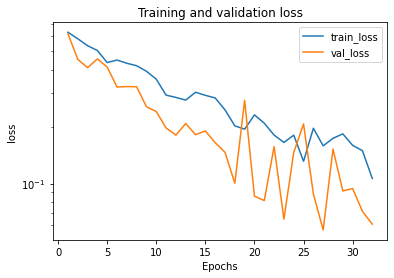

6/6 [==============================] - 0s 1ms/step
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 32)                896       
                                                                 
 dropout_51 (Dropout)        (None, 32)                0         
                                                                 
 dense_169 (Dense)           (None, 16)                528       
                                                                 
 dense_170 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


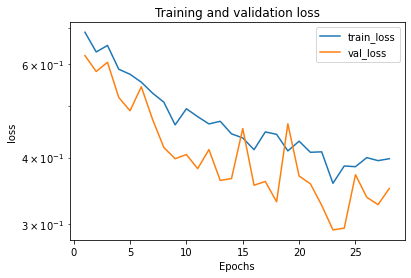

6/6 [==============================] - 0s 1ms/step
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 32)                896       
                                                                 
 dropout_52 (Dropout)        (None, 32)                0         
                                                                 
 dense_172 (Dense)           (None, 16)                528       
                                                                 
 dense_173 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________
None


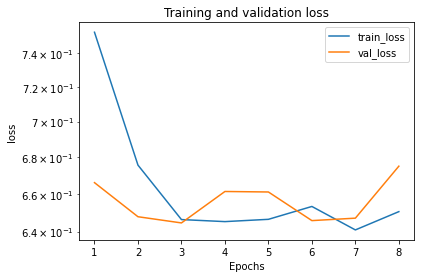

6/6 [==============================] - 0s 1ms/step


In [180]:
lr_selection = {'learning_rate':[],
                'model':[],
                'accuracy' : [],
                'val_accuracy':[],
                'kappa_train' : [],
                'kappa_test' : [],
                'epoch' : []
                }

for idx,lr in enumerate(lr_grid):
    lr_selection['learning_rate'].append(lr)
    
    # Create model
    model_c3 = keras.Sequential()
    model_c3.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))
    model_c3.add(Dropout(0.25))
    model_c3.add(Dense(units = 16,activation='relu'))
    model_c3.add(Dense(units = 2, activation='softmax'))
    
    # Compile the network
    optimizer = Adam(learning_rate=lr)
    model_c3.compile(optimizer= optimizer, #'adam', # 'rmsprop', # Optimization method
                  loss='categorical_crossentropy', # Error metric to minimize
                  metrics=['accuracy'] # Error metrics to report
                  )
    print(model_c3.summary())
    
    lr_selection['model'].append(model_c3)
    
    checkpoint_path = '../models/lr_selec/cls-lrSel'+str(idx)+'.hdf5'
    checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,
        save_freq='epoch',
        save_weights_only=False,
        verbose=0
    )
    
    history_c3 = model_c3.fit(
        X_train, 
        y_train_a, 
        epochs=80, 
        validation_split=0.20, 
        batch_size=15, 
        verbose=0,
        callbacks=[early_stopping,checkpoint]
    )
    
    lr_selection['accuracy'].append(history_c3.history['accuracy'][-1])
    lr_selection['val_accuracy'].append(history_c3.history['val_accuracy'][-1])
    lr_selection['epoch'].append(len(history_c3.history['accuracy']))
    
    
    plot_metric(history_c3,'loss')
    
    y_pred_train_c3 = model_c3.predict(X_train) # This provides the probability for each class
    y_pred_test_c3 = model_c3.predict(X_test) # This provides the probability for each class

    # !!! We need to extract for each row which is the class which the highest probability
    # which corresponds to the index of the sublist
    y_pred_train_c3 = np.argmax(y_pred_train_c3, axis=1).reshape(-1,1)
    y_pred_test_c3 = np.argmax(y_pred_test_c3, axis=1).reshape(-1,1)

    #model_performance_class(y_train, y_pred_train_c3, y_test, y_pred_test_c3)
    
    lr_selection['kappa_train'].append(cohen_kappa_score(y_train, y_pred_train_c3))
    lr_selection['kappa_test'].append(cohen_kappa_score(y_test, y_pred_test_c3))



In [ ]:
# Question
# ??? Can you store a plot in a dataframe?
# ??? After all the epochs saved in history, which will be the accuracy?
# ??? What's the difference between history and model?
# ??? How can the validation_loss be lower than the train_loss? (be better)

In [182]:
lr_selection_df = pd.DataFrame(lr_selection)
lr_selection_df

,learning_rate,model,accuracy,val_accuracy,kappa_train,kappa_test,epoch
0,0.000464,<keras.engine.sequential.Sequential object at ...,0.946078,0.974026,0.967825,0.890060,80
1,0.000681,<keras.engine.sequential.Sequential object at ...,0.985294,0.980519,0.991242,0.933702,80
2,0.001000,<keras.engine.sequential.Sequential object at ...,0.988562,1.000000,0.997081,0.955576,69
3,0.001468,<keras.engine.sequential.Sequential object at ...,0.985294,0.993506,0.997081,0.933364,61
4,0.002154,<keras.engine.sequential.Sequential object at ...,0.986928,0.987013,0.991242,0.933702,32
5,0.003162,<keras.engine.sequential.Sequential object at ...,0.983660,0.987013,0.991242,0.956024,31
6,0.004642,<keras.engine.sequential.Sequential object at ...,0.977124,1.000000,0.997075,0.978122,26
7,0.006813,<keras.engine.sequential.Sequential object at ...,0.980392,0.967532,0.982399,0.933364,32
8,0.010000,<keras.engine.sequential.Sequential object at ...,0.957516,0.974026,0.985375,0.878144,17
9,0.014678,<keras.engine.sequential.Sequential object at ...,0.975490,0.987013,0.979486,0.921660,24


In [185]:
lr_selection_df[lr_selection_df.kappa_test==lr_selection_df.kappa_test.max()]

,learning_rate,model,accuracy,val_accuracy,kappa_train,kappa_test,epoch
6,0.004642,<keras.engine.sequential.Sequential object at ...,0.977124,1.0,0.997075,0.978122,26


In [186]:
lr_selection_df['trade_off'] = lr_selection_df.kappa_train-lr_selection_df.kappa_test

In [187]:
lr_selection_df

,learning_rate,model,accuracy,val_accuracy,kappa_train,kappa_test,epoch,trade_off
0,0.000464,<keras.engine.sequential.Sequential object at ...,0.946078,0.974026,0.967825,0.890060,80,0.077765
1,0.000681,<keras.engine.sequential.Sequential object at ...,0.985294,0.980519,0.991242,0.933702,80,0.057540
2,0.001000,<keras.engine.sequential.Sequential object at ...,0.988562,1.000000,0.997081,0.955576,69,0.041504
3,0.001468,<keras.engine.sequential.Sequential object at ...,0.985294,0.993506,0.997081,0.933364,61,0.063716
4,0.002154,<keras.engine.sequential.Sequential object at ...,0.986928,0.987013,0.991242,0.933702,32,0.057540
5,0.003162,<keras.engine.sequential.Sequential object at ...,0.983660,0.987013,0.991242,0.956024,31,0.035218
6,0.004642,<keras.engine.sequential.Sequential object at ...,0.977124,1.000000,0.997075,0.978122,26,0.018953
7,0.006813,<keras.engine.sequential.Sequential object at ...,0.980392,0.967532,0.982399,0.933364,32,0.049035
8,0.010000,<keras.engine.sequential.Sequential object at ...,0.957516,0.974026,0.985375,0.878144,17,0.107230
9,0.014678,<keras.engine.sequential.Sequential object at ...,0.975490,0.987013,0.979486,0.921660,24,0.057826


In [ ]:
# Question
# ??? Does the following curve has any sense in relation to trade-off variance. Overfitting??

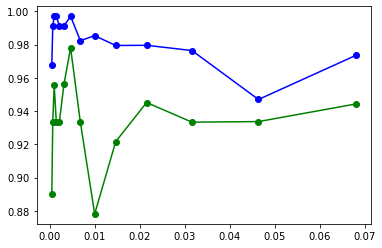

In [198]:
plt.plot(lr_selection_df.learning_rate[:14], lr_selection_df.kappa_train[:14], 'b', marker='o')
plt.plot(lr_selection_df.learning_rate[:14], lr_selection_df.kappa_test[:14], 'g', marker='o')
plt.show()

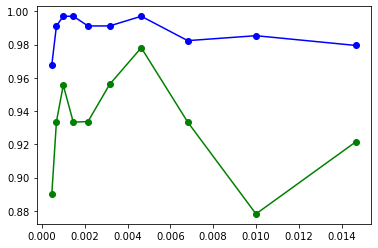

In [196]:
plt.plot(lr_selection_df.learning_rate[:10], lr_selection_df.kappa_train[:10], 'b', marker='o')
plt.plot(lr_selection_df.learning_rate[:10], lr_selection_df.kappa_test[:10], 'g', marker='o')
plt.show()

In [195]:
lr_selection_df.iloc[:10,:].sort_values('trade_off')

,learning_rate,model,accuracy,val_accuracy,kappa_train,kappa_test,epoch,trade_off
6,0.004642,<keras.engine.sequential.Sequential object at ...,0.977124,1.000000,0.997075,0.978122,26,0.018953
5,0.003162,<keras.engine.sequential.Sequential object at ...,0.983660,0.987013,0.991242,0.956024,31,0.035218
2,0.001000,<keras.engine.sequential.Sequential object at ...,0.988562,1.000000,0.997081,0.955576,69,0.041504
7,0.006813,<keras.engine.sequential.Sequential object at ...,0.980392,0.967532,0.982399,0.933364,32,0.049035
1,0.000681,<keras.engine.sequential.Sequential object at ...,0.985294,0.980519,0.991242,0.933702,80,0.057540
4,0.002154,<keras.engine.sequential.Sequential object at ...,0.986928,0.987013,0.991242,0.933702,32,0.057540
9,0.014678,<keras.engine.sequential.Sequential object at ...,0.975490,0.987013,0.979486,0.921660,24,0.057826
3,0.001468,<keras.engine.sequential.Sequential object at ...,0.985294,0.993506,0.997081,0.933364,61,0.063716
0,0.000464,<keras.engine.sequential.Sequential object at ...,0.946078,0.974026,0.967825,0.890060,80,0.077765
8,0.010000,<keras.engine.sequential.Sequential object at ...,0.957516,0.974026,0.985375,0.878144,17,0.107230


## **Which approach(es) did you find helpful to improve your model performance?**

In [199]:
# First model: Kappa Test: 0.97

# Dropout layer: Kappa Test: 0.92

# Learning rate selection over dropout: 0.978